In [ ]:
# --- ANÁLISIS DE ESTRUCTURA DEL FORMULARIO DE SEGURO VEHICULAR ---

import pandas as pd

# Subir el archivo desde tu equipo (si no está ya en Colab)
from google.colab import files
uploaded = files.upload()

# Cargar el archivo Excel (ajusta el nombre si difiere)
df = pd.read_excel("SEGUROS(respuestas).xlsx")

# Mostrar información básica
print("🔹 Dimensiones del dataset:")
print(df.shape)

print("\n🔹 Primeras filas:")
display(df.head())

print("\n🔹 Tipos de datos por columna:")
print(df.dtypes)

print("\n🔹 Porcentaje de valores nulos por variable:")
print(df.isnull().mean() * 100)

print("\n🔹 Resumen estadístico (solo variables numéricas):")
display(df.describe())


Saving SEGUROS(respuestas).xlsx to SEGUROS(respuestas).xlsx
🔹 Dimensiones del dataset:
(82, 15)

🔹 Primeras filas:


,Marca temporal,1. Edad:,2. Sexo:,3. Ocupación principal:,4. ¿Cómo nos conoció?,5. ¿Qué tan fácil fue contactarnos?,6. Tipo de vehículo que posee:,7. Uso principal del vehículo,8. ¿Con qué frecuencia utiliza su vehículo?,9. ¿Qué cobertura le interesa más en un seguro vehicular? (Puede marcar más de una opción),10. ¿Qué tan importante es para usted contar con un seguro actualmente?,11. ¿Cuál es el principal motivo por el que contrataría un seguro?,12. ¿Ha solicitado información sobre pólizas anteriormente?,13. ¿Terminó comprando una póliza con nosotros?,14. ¿Cuál fue el principal motivo para no adquirir la póliza?
0,2025-10-09 18:06:56.749,36,Femenino,Empleado/a,Recomendación de un familiar/amigo,Fácil,Camioneta,"Uso laboral (trabajo propio, negocio)",Todos los días,"Daños a terceros, Asistencia mecánica, Taller ...",Poco importante,Protección de bienes materiales,No,"No, pero estoy interesado/a",Precio elevado
1,2025-10-09 18:19:19.088,24,Masculino,Independiente / Negocios propios,Recomendación de un familiar/amigo,Difícil,Camioneta,Uso personal/familiar,Varias veces por semana,"Daños a terceros, Robo total del vehículo, Cob...",Muy importante,Protección de bienes materiales,Sí,Sí,NaN
2,2025-10-09 18:22:43.131,30,Femenino,Empleado/a,Recomendación de un familiar/amigo,Fácil,Auto,Uso personal/familiar,Fines de semana / ocasionalmente,"Robo total del vehículo, Daños propio",Poco importante,Exigencia laboral / de institución,No,"No, y no estoy interesado/a",En general he tenido muchos problemas con aseg...
3,2025-10-09 18:27:13.314,34,Masculino,Estudiante,"Redes sociales (Facebook, Instagram, TikTok, e...",Regular,"Vehículo de trabajo (ej. taxi, transporte, carga)","Uso laboral (trabajo propio, negocio)",Todos los días,Daños propio,Importante,Tranquilidad y seguridad personal/familiar,No,"No, pero estoy interesado/a",No era el momento adecuado
4,2025-10-09 18:28:32.850,30,Masculino,Empleado/a,"Redes sociales (Facebook, Instagram, TikTok, e...",Muy fácil,Moto,"Uso laboral (trabajo propio, negocio)",Todos los días,"Daños a terceros, Robo total del vehículo, Dañ...",Muy importante,Tranquilidad y seguridad personal/familiar,Sí,Sí,Precio elevado



🔹 Tipos de datos por columna:
Marca temporal                                                                                  datetime64[ns]
1. Edad:                                                                                                object
2. Sexo:                                                                                                object
3. Ocupación principal:                                                                                 object
4. ¿Cómo nos conoció?                                                                                   object
5. ¿Qué tan fácil fue contactarnos?                                                                     object
6. Tipo de vehículo que posee:                                                                          object
7. Uso principal del vehículo                                                                           object
8. ¿Con qué frecuencia utiliza su vehículo?                                      

,Marca temporal
count,82
mean,2025-10-16 09:09:36.667000064
min,2025-10-09 18:06:56.749000
25%,2025-10-09 20:17:06.287000064
50%,2025-10-12 21:12:13.509499904
75%,2025-10-23 15:10:11.986249984
max,2025-10-24 09:00:48.764000


In [ ]:
# --- VALIDACIÓN Y CONFIABILIDAD DEL CUESTIONARIO ---

import pandas as pd
import numpy as np

# Reutilizar el dataframe existente
# Si lo reiniciaste, vuelve a cargar:
# df = pd.read_excel("SEGUROS(respuestas).xlsx")

# Copiamos solo las columnas de escala Likert o similares
escala = df[[
    '5. ¿Qué tan fácil fue contactarnos?',
    '10. ¿Qué tan importante es para usted contar con un seguro actualmente?'
]].copy()

# Codificación ordinal
map_facilidad = {
    'Muy difícil': 1,
    'Difícil': 2,
    'Regular': 3,
    'Fácil': 4,
    'Muy fácil': 5
}

map_importancia = {
    'Nada importante': 1,
    'Poco importante': 2,
    'Regular': 3,
    'Importante': 4,
    'Muy importante': 5
}

escala['facilidad_contacto'] = escala.iloc[:, 0].map(map_facilidad)
escala['importancia_seguro'] = escala.iloc[:, 1].map(map_importancia)

# Eliminar columnas originales
escala = escala.drop(columns=escala.columns[:2])

# Calcular Alfa de Cronbach
def cronbach_alpha(df_num):
    df_num = df_num.dropna()
    k = df_num.shape[1]
    variancias = df_num.var(axis=0, ddof=1)
    var_total = df_num.sum(axis=1).var(ddof=1)
    return (k / (k - 1)) * (1 - (variancias.sum() / var_total))

alpha = cronbach_alpha(escala)
print(f"🔹 Alfa de Cronbach: {alpha:.3f}")

# Correlación entre ítems
print("\n🔹 Matriz de correlaciones:")
display(escala.corr())


🔹 Alfa de Cronbach: 0.520

🔹 Matriz de correlaciones:


,facilidad_contacto,importancia_seguro
facilidad_contacto,1.00000,0.37463
importancia_seguro,0.37463,1.00000


In [ ]:
# ------------------------
#  CODIFICACIÓN CORRECTA (SIN NORMALIZAR)
# ------------------------
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Cargar archivo (ajusta el nombre si es distinto)
df = pd.read_excel("SEGUROS(respuestas).xlsx")

# Limpieza básica de encabezados
df = df.drop(columns=["Marca temporal"], errors="ignore")
df.columns = [col.strip().replace('\n',' ').replace('\r','') for col in df.columns]

# Mantener edad como numérica (no la transformamos a etiquetas)
col_edad = [c for c in df.columns if "Edad" in c][0]
df[col_edad] = pd.to_numeric(df[col_edad], errors="coerce")
# (Opcional) rellenar NaN en edad con la media — puedes cambiar esto si prefieres otra estrategia
df[col_edad].fillna(int(df[col_edad].mean()), inplace=True)

# ------------------------
# Mapear respuestas ordinales (P5 y P10) a enteros 1..5
# ------------------------
map_facilidad = {
    "Muy difícil": 1,
    "Difícil": 2,
    "Regular": 3,
    "Fácil": 4,
    "Muy fácil": 5
}
col_p5 = "5. ¿Qué tan fácil fue contactarnos?"
df[col_p5] = df[col_p5].map(map_facilidad)

map_importancia = {
    "Nada importante": 1,
    "Poco importante": 2,
    "Regular": 3,
    "Importante": 4,
    "Muy importante": 5,
    # por si hay variantes:
    "Extremadamente importante": 5
}
col_p10 = "10. ¿Qué tan importante es para usted contar con un seguro actualmente?"
df[col_p10] = df[col_p10].map(map_importancia)

# Si hubo valores no mapeados (NaN) en P5/P10, rellenar con la moda (valor más frecuente)
if df[col_p5].isna().any():
    moda_p5 = int(df[col_p5].mode().iloc[0])
    df[col_p5].fillna(moda_p5, inplace=True)
if df[col_p10].isna().any():
    moda_p10 = int(df[col_p10].mode().iloc[0])
    df[col_p10].fillna(moda_p10, inplace=True)

# ------------------------
# Selección múltiple: P9 , P13 y P14 -> dummies binarias (0/1)
# ------------------------
cols_multi = [
    "9. ¿Qué cobertura le interesa más en un seguro vehicular? (Puede marcar más de una opción)",
    "14. ¿Cuál fue el principal motivo para no adquirir la póliza?"
]

multi_dfs = []
for col in cols_multi:
    if col in df.columns:
        # separación por coma, eliminar espacios extra
        temp = df[col].fillna("").astype(str).str.split(',')
        # crear dummies manualmente para controlar nombres
        # primero obtener todas las opciones presentes
        options = set()
        for entry in temp:
            for opt in entry:
                opt = opt.strip()
                if opt != "" and opt.lower() != "no especifica":
                    options.add(opt)
        options = sorted(options)
        # crear columnas binarias para cada opción
        temp_df = pd.DataFrame(0, index=df.index, columns=[f"{col} - {opt}" for opt in options])
        for i, entry in enumerate(temp):
            for opt in entry:
                opt = opt.strip()
                if opt != "" and opt in options:
                    temp_df.at[i, f"{col} - {opt}"] = 1
        multi_dfs.append(temp_df)
        # eliminar columna original
        df = df.drop(columns=[col], errors="ignore")

# anexar dummies (si existen)
if multi_dfs:
    df = pd.concat([df] + multi_dfs, axis=1)

# ------------------------
# Codificar restantes variables categóricas con LabelEncoder (enteros)
# ------------------------
le = LabelEncoder()
for col in df.columns:
    if col == col_edad:
        continue  # no tocar edad
    # si ya es numérico (int/float) y tiene solo 0/1 => dejar como está
    if pd.api.types.is_numeric_dtype(df[col]) and set(df[col].dropna().unique()).issubset({0,1}):
        df[col] = df[col].astype(int)
        continue
    # si es numérico pero no 0/1 (por ejemplo target codificada como texto), convertir a int si procede
    if pd.api.types.is_numeric_dtype(df[col]) and not pd.api.types.is_integer_dtype(df[col]):
        # si son floats producto de lecturas, convertir a int cuando sean enteros
        if all((df[col].dropna() % 1 == 0)):
            df[col] = df[col].astype(int)
            continue
    # si es tipo object -> aplicar LabelEncoder y convertir a entero
    if df[col].dtype == 'object' or pd.api.types.is_string_dtype(df[col]):
        df[col] = df[col].fillna("No especifica")
        df[col] = le.fit_transform(df[col].astype(str)).astype(int)

# ------------------------
# Verificación: asegurar que las columnas categóricas tienen dtype int (sin decimales)
# ------------------------
for col in df.columns:
    if col == col_edad:
        print(f"{col}: dtype={df[col].dtype} (edad, no integer forced)")
    else:
        # forzar int
        try:
            df[col] = df[col].astype(int)
        except Exception:
            pass
        print(f"{col}: dtype={df[col].dtype}, unique_vals_sample={df[col].unique()[:5]}")

# ------------------------
# Guardar CSV sin normalizar
# ------------------------
outname = "seguros_codificado.csv"
df.to_csv(outname, index=False, encoding="utf-8-sig")
print(f"\n✅ Archivo guardado: {outname}")
from google.colab import files
files.download(outname)


1. Edad:: dtype=float64 (edad, no integer forced)
2. Sexo:: dtype=int64, unique_vals_sample=[0 1 2]
3. Ocupación principal:: dtype=int64, unique_vals_sample=[0 2 1 3]
4. ¿Cómo nos conoció?: dtype=int64, unique_vals_sample=[2 3 1 0]
5. ¿Qué tan fácil fue contactarnos?: dtype=int64, unique_vals_sample=[4 2 3 5]
6. Tipo de vehículo que posee:: dtype=int64, unique_vals_sample=[1 0 6 2 3]
7. Uso principal del vehículo: dtype=int64, unique_vals_sample=[5 6 4 2 1]
8. ¿Con qué frecuencia utiliza su vehículo?: dtype=int64, unique_vals_sample=[3 4 0 1 2]
10. ¿Qué tan importante es para usted contar con un seguro actualmente?: dtype=int64, unique_vals_sample=[2 5 4 1]
11. ¿Cuál es el principal motivo por el que contrataría un seguro?: dtype=int64, unique_vals_sample=[2 0 3 7 6]
12. ¿Ha solicitado información sobre pólizas anteriormente?: dtype=int64, unique_vals_sample=[0 2 1]
13. ¿Terminó comprando una póliza con nosotros?: dtype=int64, unique_vals_sample=[1 3 2 0]
9. ¿Qué cobertura le interesa 

/tmp/ipython-input-695703731.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col_edad].fillna(int(df[col_edad].mean()), inplace=True)
/tmp/ipython-input-695703731.py:48: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols_to_scale = [c for c in df.columns if c != col_edad]  # opcional: excluir edad si no quieres escalarla
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
df.to_csv("seguros_codificado_normalizado.csv", index=False, encoding="utf-8-sig")
files.download("seguros_codificado_normalizado.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 51.5 MB/s eta 0:00:00


In [ ]:
# ==========================================
# 🧠 GENERAR DATA SINTÉTICA BASADA EN EL CSV REAL
# ==========================================
import pandas as pd
import numpy as np
from faker import Faker
from google.colab import files

# Cargar el dataset real codificado
df_real = pd.read_csv("seguros_codificado.csv")

# Semilla para reproducibilidad
np.random.seed(42)

# Crear dataset sintético con mismas columnas y 82 registros
n_rows = 82
cols = df_real.columns
df_sintetico = pd.DataFrame(columns=cols)

# Generador Faker (por si hay variables tipo edad o numéricas)
fake = Faker()

# Para cada columna, generamos datos con una distribución similar
for col in df_real.columns:
    serie = df_real[col]

    if pd.api.types.is_numeric_dtype(serie):
        # Si es numérica entera (codificación o binaria)
        if all(serie.dropna().astype(float).apply(float.is_integer)):
            valores = serie.dropna().astype(int).values
            # Generar con la misma frecuencia aproximada
            probs = np.unique(valores, return_counts=True)[1] / len(valores)
            opciones = np.unique(valores)
            df_sintetico[col] = np.random.choice(opciones, size=n_rows, p=probs)
        else:
            # Si es numérica continua (por ejemplo edad)
            mu, sigma = serie.mean(), serie.std()
            df_sintetico[col] = np.abs(np.random.normal(mu, sigma, n_rows)).round(0).astype(int)
    else:
        # Si por alguna razón hay columnas tipo texto (no debería)
        valores = serie.dropna().unique()
        df_sintetico[col] = np.random.choice(valores, size=n_rows)

# Aseguramos que los tipos sean correctos (int)
for col in df_sintetico.columns:
    try:
        df_sintetico[col] = df_sintetico[col].astype(int)
    except:
        pass

# ==========================================
# 💾 GUARDAR Y DESCARGAR CSV SINTÉTICO
# ==========================================
nombre_salida = "seguros_sintetico.csv"
df_sintetico.to_csv(nombre_salida, index=False, encoding="utf-8-sig")

print("✅ Data sintética generada correctamente:")
print(df_sintetico.head())

files.download(nombre_salida)


✅ Data sintética generada correctamente:
   1. Edad:  2. Sexo:  3. Ocupación principal:  4. ¿Cómo nos conoció?  \
0        34         0                        0                      2   
1        56         0                        3                      3   
2        43         0                        0                      3   
3        39         0                        0                      2   
4        30         1                        0                      2   

   5. ¿Qué tan fácil fue contactarnos?  6. Tipo de vehículo que posee:  \
0                                    4                               0   
1                                    3                               3   
2                                    3                               3   
3                                    4                               0   
4                                    3                               1   

   7. Uso principal del vehículo  8. ¿Con qué frecuencia utiliza su vehícul

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

# Cargar los archivos subidos
df_real = pd.read_csv("seguros_codificado.csv")
df_sint = pd.read_csv("seguros_sintetico.csv")

# Asegurar mismo número de columnas
common_cols = list(set(df_real.columns) & set(df_sint.columns))
df_real = df_real[common_cols]
df_sint = df_sint[common_cols]

# Igualar cantidad de filas si difieren
n = min(len(df_real), len(df_sint))
n_half = n // 2

# Tomar 50% de cada dataset
df_mix = pd.concat([
    df_real.sample(n=n_half, random_state=42),
    df_sint.sample(n=n_half, random_state=42)
], ignore_index=True)

# Mezclar el orden de las filas
df_mix = df_mix.sample(frac=1, random_state=42).reset_index(drop=True)

# Guardar el resultado
output_path = "seguros_mixto.csv"
df_mix.to_csv(output_path, index=False, encoding="utf-8-sig")

output_path

from google.colab import files
files.download(output_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# PROBLEMA DE CLASIFICACIÓN SUPERVISADA
## TARGET - VARIABLE :
“¿Terminó comprando una póliza con nosotros?” (codificada como 0 = No compra, 1 = Sí compra)


**Modelos predictivos supervisados que podemos trabajar:**

**Regresión logística**

- Modelo base y muy interpretativo.
- Nos permite estimar la probabilidad de compra en función de las variables explicativas (edad, sexo, ocupación, tipo de vehículo, motivos, etc.).
- Ventaja: de facil explicacion en un contexto academico.


**Árboles de decisión (Decision Tree)**

- Clasifica a los clientes según reglas claras (ejemplo: edad > 30 y vehículo = nuevo → mayor probabilidad de compra).
- Ventaja: muy visual y útil para presentaciones ejecutivas.


**Random Forest**

- Conjunto de múltiples árboles de decisión.
- Mejora la precisión y reduce el riesgo de sobreajuste.
- Ventaja: robusto y maneja bien variables categóricas codificadas como dummies.

*¿Que es una variable dummy?*
Una variable dummy convierte una categoría en un valor binario.
Los hemos usado en nuestro dataset porque los modelos matemáticos y de machine learning trabajan mejor con números que con texto.

In [ ]:
#Trabajando con Python y scikit-learn

# 1. Importar librerías
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score
import matplotlib.pyplot as plt

In [ ]:
# 2. Cargamos el dataset
df = pd.read_csv("seguros_mixto.csv")

In [ ]:
print(df.columns.tolist())


['1. Edad:', '14. ¿Cuál fue el principal motivo para no adquirir la póliza? - No era el momento adecuado', '9. ¿Qué cobertura le interesa más en un seguro vehicular? (Puede marcar más de una opción) - Robos al paso', '11. ¿Cuál es el principal motivo por el que contrataría un seguro?', '14. ¿Cuál fue el principal motivo para no adquirir la póliza? - Mi auto es muy antiguo y no lo aseguran', '7. Uso principal del vehículo', '14. ¿Cuál fue el principal motivo para no adquirir la póliza? - Precio elevado', '9. ¿Qué cobertura le interesa más en un seguro vehicular? (Puede marcar más de una opción) - Cobertura contra desastres naturales', '14. ¿Cuál fue el principal motivo para no adquirir la póliza? - No entendí bien las condiciones', '13. ¿Terminó comprando una póliza con nosotros?', '9. ¿Qué cobertura le interesa más en un seguro vehicular? (Puede marcar más de una opción) - Daños propio', '9. ¿Qué cobertura le interesa más en un seguro vehicular? (Puede marcar más de una opción) - Talle

In [ ]:
df["target_binaria"] = df["13. ¿Terminó comprando una póliza con nosotros?"].replace({
    3: 1,  # Sí
    1: 1,  # Interesada
    2: 0,  # No interesado
    0: 0   # Vacío
})

# Verificación rápida
print(df["target_binaria"].value_counts())


target_binaria
1    65
0    17
Name: count, dtype: int64


In [ ]:
X = df.drop(columns=["target_binaria"])
y = df["target_binaria"]


In [ ]:
# 4. Separamos para el entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
#Entrenamiento de modelos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

log_model = LogisticRegression(max_iter=1000, random_state=42)
rf_model = RandomForestClassifier(random_state=42)

log_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
print(y_test.unique())


[1 0]


# RESULTADOS DE EVALUACION DE DESEMPEÑO

- Matriz de confusión → para ver aciertos y errores en clasificación.

- Reporte de clasificación → precisión, recall y F1-score.

- ROC-AUC → calidad del modelo en distinguir entre positivos y negativos.

- Gráfico de importancia de variables → qué factores influyen más en la predicción.

In [ ]:
#Evaluamos desempeño
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

for model, name in [(log_model, "Logistic Regression"), (rf_model, "Random Forest")]:
    y_pred = model.predict(X_test)
    print(f"\n{name}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))



Logistic Regression
[[ 0  5]
 [ 3 17]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.77      0.85      0.81        20

    accuracy                           0.68        25
   macro avg       0.39      0.42      0.40        25
weighted avg       0.62      0.68      0.65        25

ROC-AUC: 0.38

Random Forest
[[ 1  4]
 [ 0 20]]
              precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       0.83      1.00      0.91        20

    accuracy                           0.84        25
   macro avg       0.92      0.60      0.62        25
weighted avg       0.87      0.84      0.79        25

ROC-AUC: 0.8


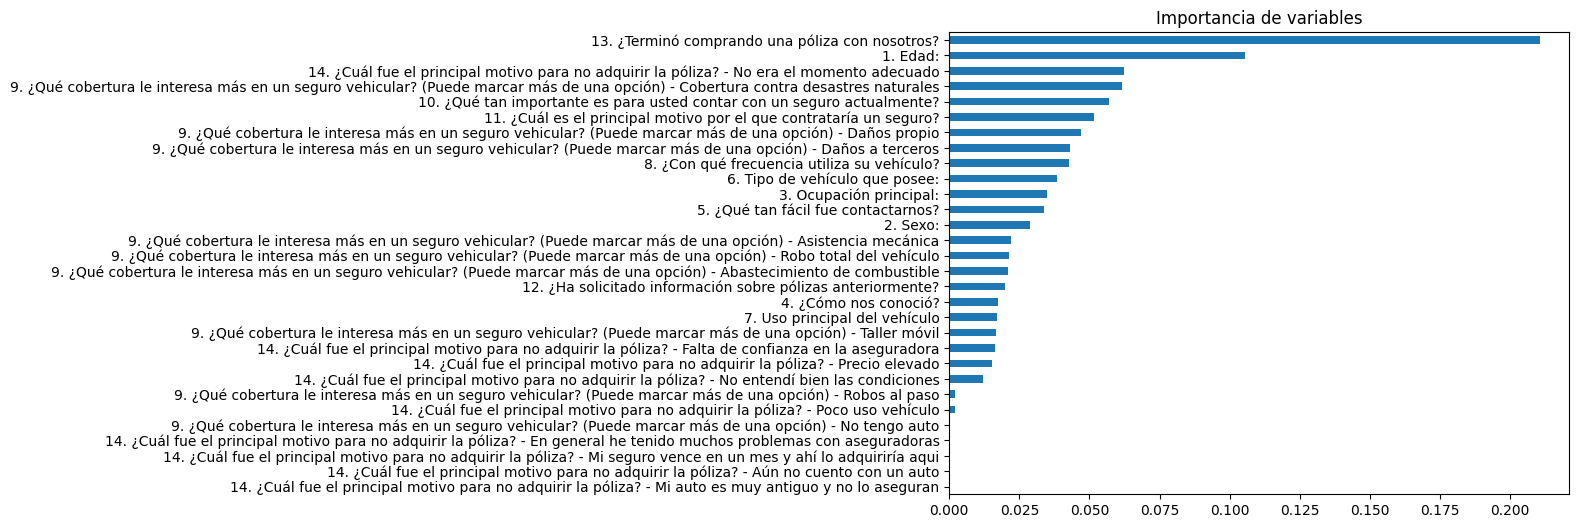

In [ ]:
#Visualización e importancia - Random Forest

import pandas as pd
import matplotlib.pyplot as plt

importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind="barh", figsize=(8,6))
plt.title("Importancia de variables")
plt.show()


#Comparación grafica de las curvas ROC en ambos modelos
- Una curva ROC para cada modelo en el mismo gráfico.

- El AUC de cada modelo mostrado en la leyenda.

- Una línea diagonal de referencia (clasificación aleatoria).

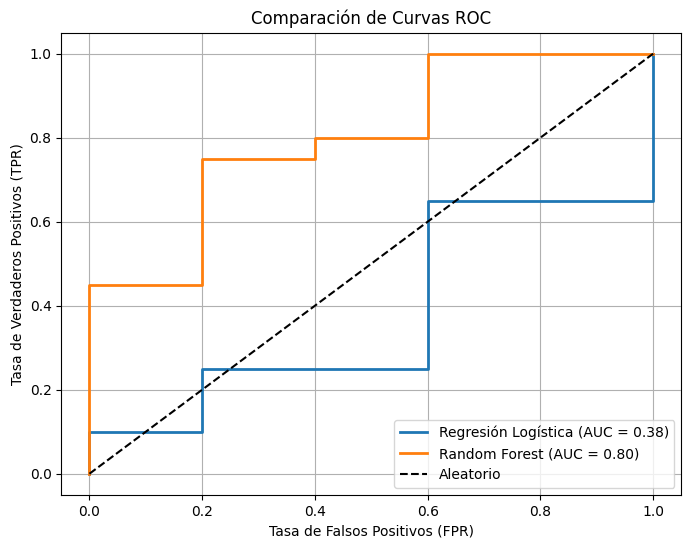

In [ ]:
#========================================================
#Comparación grafica de las curvas ROC en ambos modelos
#========================================================

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Probabilidades de cada modelo
log_probs = log_model.predict_proba(X_test)[:, 1]
rf_probs = rf_model.predict_proba(X_test)[:, 1]

# Curvas ROC
fpr_log, tpr_log, _ = roc_curve(y_test, log_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)

# AUC
auc_log = roc_auc_score(y_test, log_probs)
auc_rf = roc_auc_score(y_test, rf_probs)

# Gráfico comparativo
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f'Regresión Logística (AUC = {auc_log:.2f})', linewidth=2)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Comparación de Curvas ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


#CONCLUSIONES Y RECOMENDACIONES

**Conclusiones**
- El modelo nos permite segmentar perfiles con mayor probabilidad de compra.

- Se pueden focalizar campañas comerciales en clientes interesados o con características similares a los compradores.

- La documentación es reproducible asegura que el proceso pueda ser auditado y replicado.

- Haber aplicado las métricas (ROC-AUC, F1, matriz de confusión) respalda la confiabilidad del modelo.


**Recomendaciones estratégicas**

- Aplicar el modelo como herramienta de apoyo en las campañas de seguros vehiculares.

- Priorizar las variables más influyentes en el despliegue comercial.

- Continuar alimentando el dataset con nuevas encuestas o datos transaccionales, previamente validando las encuestas para medir su confiabilidad.

- Mantener dashboards interactivos para el monitoreo de resultados en tiempo real.